In [1]:
include("saltsolver.jl")

smallest_stability_eigs (generic function with 1 method)

In [11]:
ℓ = 3
npiece = 4
Lcav = 1.0
wantcnv = true

nsym = 4ℓ
N = nsym * npiece
h = Lcav/N
Ering, ωring = ring_eigenpair(N, ℓ, h)
γ⟂ = 0.8
ωa = round(ωring)

ctrand(n) = rand(n)-0.5
ɛrpiece = 1 + 0.3*ctrand(npiece)
ɛipiece = 1.5 * rand(npiece) # want positive
Fpiece = 1 + 0.4*ctrand(npiece)

cnvize!(v) = (v[:] = (v + ring_flip(v))/2)
if wantcnv
    cnvize!(ɛrpiece)
    cnvize!(ɛipiece)
    cnvize!(Fpiece)
end

ɛ = cn_profile(ɛrpiece + im*ɛipiece, nsym)
F = cn_profile(Fpiece, nsym)
las = Laser(ɛ, F, ωa, γ⟂)
laplacian!(J) = periodic!(J, h)

md = Mode(copy(Ering), ωring, 0.0)
Dguesses = (0.6, 0.8)
Dt = threshold!(laplacian!, md, las, Dguesses)
ωt = md.ω
Es = (copy(md.E), ring_flip(md.E))

H, Is, Js, Ks, GD = overlap_integrals(Es, ωt, Dt, las, nsym, ℓ, Lcav);
I, J, K = Is[1], Js[1], Ks[1];
i, j, k = I/H, J/H, K/H;

println("H = ", H, '\n')

# for z² in (1, -1)
# #     println(2imag(2i+j + z²*k))
#     radicand = imag(j - z²*k)^2 + 8real(k)*real(j + z²*k)
#     term = -imag(j + 3z²*k)
#     println("term = ", term)
#     println("√rad = ", √radicand)
#     for sn in (1, -1)
#         println(term + sn*√radicand)
#     end
#     z² == 1 && println()
# end

H = 0.15609313004339678 + 0.7184643599200559im



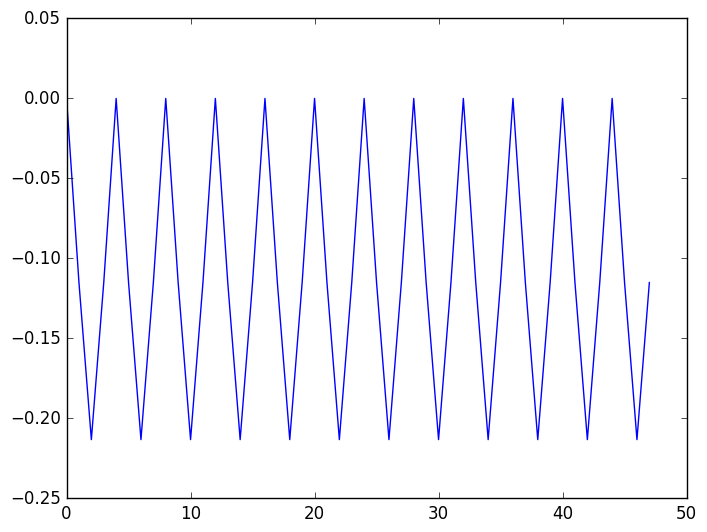

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c564710>

In [15]:
plot(imag(Es[1] .* Es[2]))